K-State Honor Code:
    
On my honor, as a student, I have neither given nor received unauthorized aid on this academic work." A grade of XF can result from a breach of academic honesty    
    
Your name: Mohammad Najjartabar Bisheh 

In [440]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://i.pinimg.com/originals/db/4f/88/db4f88f155d22599f59765e14f4c5497.jpg")

# 1. Business understanding:


### Movies are an important part of human's life these days. We can name movies as the cheapest and most available fun that everyone can have and it is not depended to how wealthy we are. A great movie can entertain almost everyon on this planet. But what makes a movie great? A good story? Great characters? cinematography and actors' performance? The answer is yes, all of these can impact on the quality of a movie. The important question is how we can measure quality and perfomrance of a movie?
### Quality and performance of a movie can be measured in two point of view. First of all and as a general idea, critics review's can be a good refference to judge about quality of a movie. Critics will consider quality of a movie by their own criteria (e.g. Directing, Writing, Cinematography, Editing, Acting, Production Design, Sound and etc.). However to talk about performance of a movie, "perceived performance of audience" plays an important rule. To measure "perceived performance of audience" maybe we can simply look at amount of money that movie made but what have impact on the sell of a movie? 
### Todays, there are some websites (like IMDB) which does movie rating usually base on peoples' weighted vote. In this project, (based on some given information like genre, budget, duration, and ...) I want to see what is impact of each (and maybe combination of some) factor on IMDB rating which can assume as "perceived performance of audience". 

























In [441]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import the scatter_matrix functionality
from pandas.plotting import scatter_matrix
import plotly.graph_objects as go
import plotly.express as px
import pingouin as pg
import statsmodels.api as sm
from statsmodels.formula.api import ols



# 2. Data understanding: The dataset contains a large number of variables with different types (e.g., numerical, categorial). Provide a brief summary of data understanding. Specifically, you need to:



In [442]:
# Reading dataset
df = pd.read_csv('movie_metadata.csv\movie_metadata.csv')    
df.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   
2                 11000.0  200074175.0        Action|Adventure|Thriller  ...   
3                 27000.0  448130642.0                  Action|Thriller  ...   
4                   131.0          NaN                      Documentary  ...   

  num_user_for_reviews language  country  content_rating       budget  \
0               3054.0  English      USA           PG-13  237000000.0   
1               1238.0  English      USA           PG-13  300000000.0   
2                994.0  English       UK           PG-13  245000000.0   
3               2701.0  English      USA           PG-13  250000000.0   
4                  NaN      NaN      NaN             NaN          NaN   

   title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0      2009.0                  936.0        7.9          1.78   
1      2007.0                 5000.0        7.1          2.35   
2      2015.0                  393.0        6.8          2.35   
3      2012.0                23000.0        8.5          2.35   
4         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

### Just with a look at the head of data we can see there are NaN and zero values which means missing data. df.info proves this that we are missing many values and data needs to be cleaned.

In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [444]:
# Describe data

df.describe()

num_critic_for_reviews     duration  director_facebook_likes  \
count             4993.000000  5028.000000              4939.000000   
mean               140.194272   107.201074               686.509212   
std                121.601675    25.197441              2813.328607   
min                  1.000000     7.000000                 0.000000   
25%                 50.000000    93.000000                 7.000000   
50%                110.000000   103.000000                49.000000   
75%                195.000000   118.000000               194.500000   
max                813.000000   511.000000             23000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             5020.000000             5036.000000  4.159000e+03   
mean               645.009761             6560.047061  4.846841e+07   
std               1665.041728            15020.759120  6.845299e+07   
min                  0.000000                0.000000  1.620000e+02   
25%                133.000000              614.000000  5.340988e+06   
50%                371.500000              988.000000  2.551750e+07   
75%                636.000000            11000.000000  6.230944e+07   
max              23000.000000           640000.000000  7.605058e+08   

       num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
count     5.043000e+03                5043.000000           5030.000000   
mean      8.366816e+04                9699.063851              1.371173   
std       1.384853e+05               18163.799124              2.013576   
min       5.000000e+00                   0.000000              0.000000   
25%       8.593500e+03                1411.000000              0.000000   
50%       3.435900e+04                3090.000000              1.000000   
75%       9.630900e+04               13756.500000              2.000000   
max       1.689764e+06              656730.000000             43.000000   

       num_user_for_reviews        budget   title_year  \
count           5022.000000  4.551000e+03  4935.000000   
mean             272.770808  3.975262e+07  2002.470517   
std              377.982886  2.061149e+08    12.474599   
min                1.000000  2.180000e+02  1916.000000   
25%               65.000000  6.000000e+06  1999.000000   
50%              156.000000  2.000000e+07  2005.000000   
75%              326.000000  4.500000e+07  2011.000000   
max             5060.000000  1.221550e+10  2016.000000   

       actor_2_facebook_likes   imdb_score  aspect_ratio  movie_facebook_likes  
count             5030.000000  5043.000000   4714.000000           5043.000000  
mean              1651.754473     6.442138      2.220403           7525.964505  
std               4042.438863     1.125116      1.385113          19320.445110  
min                  0.000000     1.600000      1.180000              0.000000  
25%                281.000000     5.800000      1.850000              0.000000  
50%                595.000000     6.600000      2.350000            166.000000  
75%                918.000000     7.200000      2.350000           3000.000000  
max             137000.000000     9.500000     16.000000         349000.000000

## From describe data we can get basic statistics information from data. 
## However to have a sufficient judgment better not to rely on these data only and I won't comment on it seperatly.

## data quality issues

(William McKnight, in Information Management, 2014)

Sources of Poor Data Quality
The following are seven sources of data quality issues.

1.Entry quality: Did the information enter the system correctly at the origin?


2.Process quality: Proper checks and quality control at each touchpoint along the path can help ensure that problems are rooted out, but these checks are often absent in legacy processes.


3.Identification quality: Data quality processes can largely eliminate this problem by matching records, identifying duplicates, and placing a confidence score4 on the similarity of records.


4.Integration quality: Is all the known information about an object integrated to the point of providing an accurate representation of the object?


5.Usage quality: Is the information used and interpreted correctly at the point of access?


6.Aging quality: Has enough time passed that the validity of the information can no longer be trusted?


7.Organizational quality: The biggest challenge to reconciliation is getting the various departments to agree that their A equals the other’s B equals the other’s C plus D.

### Based on our current dataset, we need to take care of missing and duplicated values.


In [445]:
#Finding and deleting duplicated values
len(df[df.duplicated()])

45

In [446]:
len(df)

5043

In [447]:
# Finding and taking care of missing values
df.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5043 non-null bool
director_name                5043 non-null bool
num_critic_for_reviews       5043 non-null bool
duration                     5043 non-null bool
director_facebook_likes      5043 non-null bool
actor_3_facebook_likes       5043 non-null bool
actor_2_name                 5043 non-null bool
actor_1_facebook_likes       5043 non-null bool
gross                        5043 non-null bool
genres                       5043 non-null bool
actor_1_name                 5043 non-null bool
movie_title                  5043 non-null bool
num_voted_users              5043 non-null bool
cast_total_facebook_likes    5043 non-null bool
actor_3_name                 5043 non-null bool
facenumber_in_poster         5043 non-null bool
plot_keywords                5043 non-null bool
movie_imdb_link              5043 non-null bool
num_user_for_reviews         

## See if there is any zeros in the table

In [448]:
criteria1 = df['budget'] == 0;
criteria2 = df['gross'] == 0;
criteria3 = df['color'] == 0;
criteria4 = df['director_name'] == 0;
criteria5 = df['num_critic_for_reviews'] == 0;
criteria6 = df['duration'] == 0;
criteria7 = df['director_facebook_likes'] == 0;
criteria8 = df['actor_3_facebook_likes'] == 0;
criteria9 = df['actor_2_name'] == 0;
criteria10 = df['actor_1_facebook_likes'] == 0;
criteria11 = df['genres'] == 0;
criteria12 = df['actor_1_name'] == 0;
criteria13 = df['genres'] == 0;
criteria14 = df['movie_title'] == 0;
criteria15 = df['num_voted_users'] == 0;
criteria16 = df['cast_total_facebook_likes'] == 0;
criteria17 = df['actor_3_name'] == 0;
criteria18 = df['facenumber_in_poster'] == 0;
criteria19 = df['plot_keywords'] == 0;
criteria20 = df['movie_imdb_link'] == 0;
criteria21 = df['num_user_for_reviews'] == 0;
criteria22 = df['language'] == 0;
criteria23 = df['content_rating'] == 0;
criteria24 = df['title_year'] == 0;
criteria25 = df['actor_2_facebook_likes'] == 0;
criteria26 = df['imdb_score'] == 0;
criteria26 = df['movie_facebook_likes'] == 0;



criteria = criteria1 & criteria2 & criteria3 & criteria4 & criteria5 & criteria6 & criteria7 & criteria8 & criteria9 & criteria10 & criteria11 & criteria12 & criteria13 & criteria14 & criteria15 & criteria16 & criteria17 & criteria18 & criteria19 & criteria20 & criteria21 & criteria22 & criteria23 & criteria24 & criteria25 & criteria26


In [449]:
# There are some missing values and marked by “”. I replace them with "na"
df['content_rating'] = df['content_rating'].str.replace('“”', 'na')
df['content_rating'] = df['content_rating'].str.replace('0', 'na')


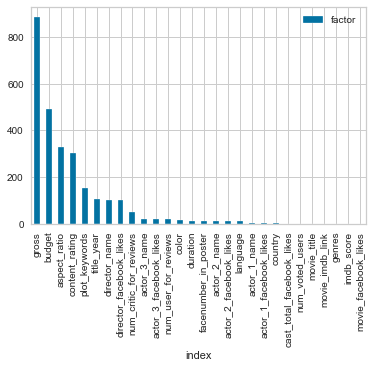

In [450]:
missing = df.isna()
missing2 = missing.sum()
missing2 = missing2.reset_index(level=0)
missing2 = missing2.rename(columns={0: 'factor', 1: 'total'})
missing2 = missing2.set_index('index')
missing2 = missing2.sort_values('factor', ascending=False).plot(kind='bar')
# if I want to do analysis which contain gross, budget, aspect_ratio or content rating I will use dff which is df without "NA".

### More than 800 movies we don't have their gross income and about 500 movies we don't have their budget. Also cosiderable missing values in aspect ratio and content rating and all of these factors are important in IMDB score analysis so we need to do something.

In [451]:
missing['actor_1_name'].describe()

count      5043
unique        2
top       False
freq       5036
Name: actor_1_name, dtype: object

In [452]:
df['gross'].describe()

count    4.159000e+03
mean     4.846841e+07
std      6.845299e+07
min      1.620000e+02
25%      5.340988e+06
50%      2.551750e+07
75%      6.230944e+07
max      7.605058e+08
Name: gross, dtype: float64

In [453]:
df['director_name'].value_counts().head(10)

Steven Spielberg     26
Woody Allen          22
Clint Eastwood       20
Martin Scorsese      20
Ridley Scott         17
Steven Soderbergh    16
Tim Burton           16
Spike Lee            16
Renny Harlin         15
Oliver Stone         14
Name: director_name, dtype: int64

In [454]:
df['actor_1_name'].value_counts().head(10)

Robert De Niro       49
Johnny Depp          41
Nicolas Cage         33
J.K. Simmons         31
Denzel Washington    30
Matt Damon           30
Bruce Willis         30
Liam Neeson          29
Harrison Ford        27
Robin Williams       27
Name: actor_1_name, dtype: int64

In [455]:
df['budget'].value_counts().head()

20000000.0    174
15000000.0    143
25000000.0    142
30000000.0    141
10000000.0    135
Name: budget, dtype: int64

### These are some general information about some selected columns to get a rough idea about them!

# Data preparation

### I figured there are 45 duplicated values, no empty cell but bunch of "NA" values. I am going to delete all duplicted rows. For "NA" values I won't delete all rows that contain it but I will remove from the rows that I need because I don't want to lose useful info.

In [456]:
df = df.drop_duplicates(keep='first')
len(df)

4998

### So we didn't have empty cell but there are NA values. First we're gonna drop a row if all cells are NA.
### Then since IMDB score is the most important factor (our response here) so I drop all the row that we don't have IMDB score for it.

In [457]:

df.dropna(how='all');
df.dropna(subset=['imdb_score'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 5042
Data columns (total 28 columns):
color                        4979 non-null object
director_name                4895 non-null object
num_critic_for_reviews       4949 non-null float64
duration                     4983 non-null float64
director_facebook_likes      4895 non-null float64
actor_3_facebook_likes       4975 non-null float64
actor_2_name                 4985 non-null object
actor_1_facebook_likes       4991 non-null float64
gross                        4124 non-null float64
genres                       4998 non-null object
actor_1_name                 4991 non-null object
movie_title                  4998 non-null object
num_voted_users              4998 non-null int64
cast_total_facebook_likes    4998 non-null int64
actor_3_name                 4975 non-null object
facenumber_in_poster         4985 non-null float64
plot_keywords                4846 non-null object
movie_imdb_link              4998 non-

### Our dataset in df is not constant but I don't want to lose it because we can have good analysis on it.


In [458]:
# To have a constant dataset I made dff:
dff = df.dropna()
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 0 to 5042
Data columns (total 28 columns):
color                        3723 non-null object
director_name                3723 non-null object
num_critic_for_reviews       3723 non-null float64
duration                     3723 non-null float64
director_facebook_likes      3723 non-null float64
actor_3_facebook_likes       3723 non-null float64
actor_2_name                 3723 non-null object
actor_1_facebook_likes       3723 non-null float64
gross                        3723 non-null float64
genres                       3723 non-null object
actor_1_name                 3723 non-null object
movie_title                  3723 non-null object
num_voted_users              3723 non-null int64
cast_total_facebook_likes    3723 non-null int64
actor_3_name                 3723 non-null object
facenumber_in_poster         3723 non-null float64
plot_keywords                3723 non-null object
movie_imdb_link              3723 non-

In [459]:
b = pd.DataFrame(dff.genres.str.split('|').tolist(), index=dff.imdb_score).stack()
b = b.reset_index()[[0, 'imdb_score']] # genres variable is currently labeled 0
b.columns = ['genres', 'imdb_score'] # renaming genres
b.head()

genres  imdb_score
0     Action         7.9
1  Adventure         7.9
2    Fantasy         7.9
3     Sci-Fi         7.9
4     Action         7.1

### b is a dataframe which contains movies based on their unique genres

In [460]:
# just a different way
df2 = dff.join(dff.pop('genres').str.get_dummies('|'))
df2.head()


color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
5  Color     Andrew Stanton                   462.0     132.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
5                    475.0                   530.0   Samantha Morton   

   actor_1_facebook_likes        gross     actor_1_name  ... Horror  Music  \
0                  1000.0  760505847.0      CCH Pounder  ...      0      0   
1                 40000.0  309404152.0      Johnny Depp  ...      0      0   
2                 11000.0  200074175.0  Christoph Waltz  ...      0      0   
3                 27000.0  448130642.0        Tom Hardy  ...      0      0   
5                   640.0   73058679.0     Daryl Sabara  ...      0      0   

   Musical Mystery  Romance Sci-Fi Sport  Thriller War Western  
0        0       0        0      1     0         0   0       0  
1        0       0        0      0     0         0   0       0  
2        0       0        0      0     0         1   0       0  
3        0       0        0      0     0         1   0       0  
5        0       0        0      1     0         0   0       0  

[5 rows x 49 columns]

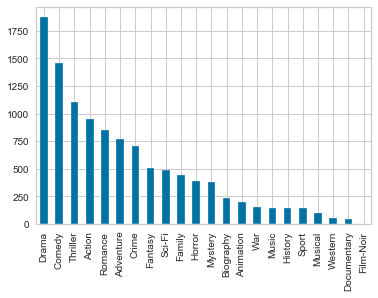

In [461]:
b['genres'].value_counts().plot(kind='bar')

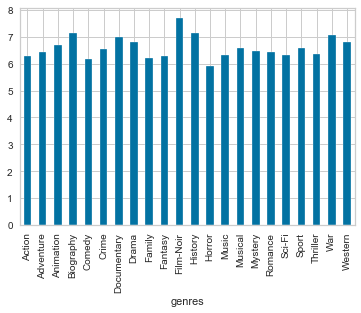

In [462]:
b.groupby('genres')['imdb_score'].mean().plot.bar()

### These plots shows most of the genres are drama, comedy, thriller or action but they don't usually have the highest IMDB value 

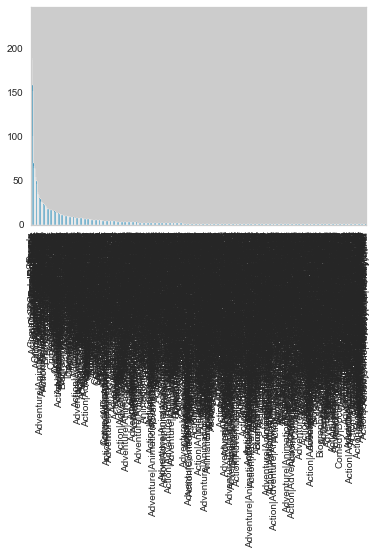

In [463]:
df0 = df[['movie_title','genres', 'title_year', 'gross', 'duration', 'imdb_score']];

df1= df[['genres','imdb_score']];
df1['genres'].value_counts().plot(kind='bar')

# I made this mistakenly and then I figured it looks like an beautifull painting with shadows so I just want to keep it!

## In the example they digged in to content_rating and tried to replace some values with other values. I really don't see any necessity to do that but to show that I could do that I'll do and make a different dataframe for it!

In [464]:
dff['content_rating'].value_counts()

R            1687
PG-13        1291
PG            563
G              87
Not Rated      34
Unrated        22
Approved       17
X              10
NC-17           6
Passed          3
M               2
GP              1
Name: content_rating, dtype: int64

In [465]:
#First method
dff_replace = dff.replace({'content_rating': 'GP'}, {'content_rating': 'R'});
dff_replace = dff_replace.replace({'content_rating': 'M'}, {'content_rating': 'R'});
dff_replace = dff_replace.replace({'content_rating': 'Passed'}, {'content_rating': 'R'});
dff_replace = dff_replace.replace({'content_rating': 'NC-17'}, {'content_rating': 'R'});
dff_replace['content_rating'].value_counts()

R            1699
PG-13        1291
PG            563
G              87
Not Rated      34
Unrated        22
Approved       17
X              10
Name: content_rating, dtype: int64

In [466]:
#second method
# create a function
def f(x):
    if x == 'R': return 'R'
    elif x == 'PG-13': return 'PG-13'
    elif x == 'PG': return 'PG'
    elif x == 'G': return 'G'
    elif x == 'Not Rated': return 'Not Rated'
    elif x == 'Unrated': return 'Unrated'
    elif x == 'Approved': return 'Approved'
    elif x == 'X': return 'X'
    else: return 'R'
    
    

In [467]:
dff_replace['content_rating'] = dff['content_rating'].apply(f)
dff_replace['content_rating'].value_counts()

R            1699
PG-13        1291
PG            563
G              87
Not Rated      34
Unrated        22
Approved       17
X              10
Name: content_rating, dtype: int64

## So we have a clean data now and we can go ahead and do some analysis!

# Business intelligence

### first of all to compare success in terms of money we need to know about profit of each movie. Since we have gross (income) and budget then we can find profit which is equal to gross - profit

In [468]:
dff['profit'] = dff ['gross'] - dff['budget']
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 0 to 5042
Data columns (total 28 columns):
color                        3723 non-null object
director_name                3723 non-null object
num_critic_for_reviews       3723 non-null float64
duration                     3723 non-null float64
director_facebook_likes      3723 non-null float64
actor_3_facebook_likes       3723 non-null float64
actor_2_name                 3723 non-null object
actor_1_facebook_likes       3723 non-null float64
gross                        3723 non-null float64
actor_1_name                 3723 non-null object
movie_title                  3723 non-null object
num_voted_users              3723 non-null int64
cast_total_facebook_likes    3723 non-null int64
actor_3_name                 3723 non-null object
facenumber_in_poster         3723 non-null float64
plot_keywords                3723 non-null object
movie_imdb_link              3723 non-null object
num_user_for_reviews         3723 non-

C:\Users\mnajjartabar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [469]:

dff['return_on_investment_perc'] = (dff ['profit'] / dff['budget']) * 100
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 0 to 5042
Data columns (total 29 columns):
color                        3723 non-null object
director_name                3723 non-null object
num_critic_for_reviews       3723 non-null float64
duration                     3723 non-null float64
director_facebook_likes      3723 non-null float64
actor_3_facebook_likes       3723 non-null float64
actor_2_name                 3723 non-null object
actor_1_facebook_likes       3723 non-null float64
gross                        3723 non-null float64
actor_1_name                 3723 non-null object
movie_title                  3723 non-null object
num_voted_users              3723 non-null int64
cast_total_facebook_likes    3723 non-null int64
actor_3_name                 3723 non-null object
facenumber_in_poster         3723 non-null float64
plot_keywords                3723 non-null object
movie_imdb_link              3723 non-null object
num_user_for_reviews         3723 non-

C:\Users\mnajjartabar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [470]:
#dff = dff.set_index('movie_title');

dff['profit'].head()

0    523505847.0
1      9404152.0
2    -44925825.0
3    198130642.0
5   -190641321.0
Name: profit, dtype: float64

In [471]:
best_profit = dff.pivot_table(index='movie_title', aggfunc='sum', fill_value=0).sort_values(by=['profit'], ascending=False).head(20)
best_profit.head()

actor_1_facebook_likes  \
movie_title                                                   
Avatar                                                 1000   
Jurassic World                                         3000   
Titanic                                               29000   
Star Wars: Episode IV - A New Hope                    11000   
E.T. the Extra-Terrestrial                              861   

                                     actor_2_facebook_likes  \
movie_title                                                   
Avatar                                                  936   
Jurassic World                                         2000   
Titanic                                               14000   
Star Wars: Episode IV - A New Hope                     1000   
E.T. the Extra-Terrestrial                              725   

                                     actor_3_facebook_likes  aspect_ratio  \
movie_title                                                                 
Avatar                                                  855          1.78   
Jurassic World                                         1000          2.00   
Titanic                                                 794          2.35   
Star Wars: Episode IV - A New Hope                      504          2.35   
E.T. the Extra-Terrestrial                              548          1.85   

                                        budget  cast_total_facebook_likes  \
movie_title                                                                 
Avatar                               237000000                       4834   
Jurassic World                       150000000                       8458   
Titanic                              200000000                      45223   
Star Wars: Episode IV - A New Hope    11000000                      13485   
E.T. the Extra-Terrestrial            10500000                       2811   

                                     director_facebook_likes  duration  \
movie_title                                                              
Avatar                                                     0       178   
Jurassic World                                           365       124   
Titanic                                                    0       194   
Star Wars: Episode IV - A New Hope                         0       125   
E.T. the Extra-Terrestrial                             14000       120   

                                     facenumber_in_poster      gross  \
movie_title                                                            
Avatar                                                  0  760505847   
Jurassic World                                          0  652177271   
Titanic                                                 0  658672302   
Star Wars: Episode IV - A New Hope                      1  460935665   
E.T. the Extra-Terrestrial                              0  434949459   

                                     imdb_score  movie_facebook_likes  \
movie_title                                                             
Avatar                                      7.9                 33000   
Jurassic World                              7.0                150000   
Titanic                                     7.7                 26000   
Star Wars: Episode IV - A New Hope          8.7                 33000   
E.T. the Extra-Terrestrial                  7.9                 34000   

                                     num_critic_for_reviews  \
movie_title                                                   
Avatar                                                  723   
Jurassic World                                          644   
Titanic                                                 315   
Star Wars: Episode IV - A New Hope                      282   
E.T. the Extra-Terrestrial                              215   

                                     num_user_for_reviews  num_voted_users  \
movie_title      

(-1.3104572272260597,
 1.151403801508614,
 -1.1099411282454879,
 1.2327149813997411)

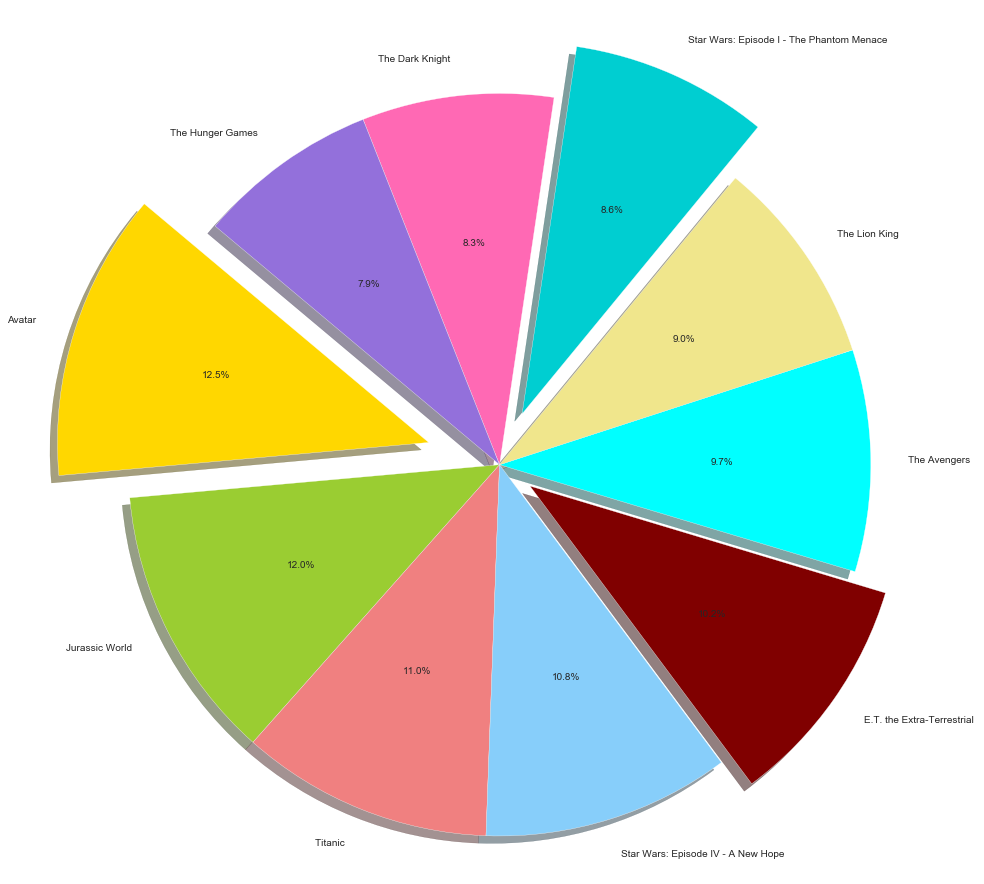

In [472]:
plt.figure(figsize=[16,16])

pieprofit = dff[['movie_title','profit','budget','return_on_investment_perc', 'gross','imdb_score']];
pieprofit = pieprofit.sort_values(by=['profit'], ascending = False).head(10);
explode = (0.2, 0, 0, 0, 0.1, 0, 0, 0.15, 0, 0)  # explode 1st slice


colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','maroon',  'aqua', 'khaki', 'darkturquoise', 'hotpink', 'mediumpurple']

plt.pie(pieprofit['profit'], labels=pieprofit['movie_title'], explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')


### So Avatar, Jurassic World, Titanic and Starwas: Episode IV had the best profit.

In [473]:
dff['color'].value_counts().head()

Color               3600
 Black and White     123
Name: color, dtype: int64

### almost all of movies are color and just 123 of them are black and white. we can remove color column here but personally I don't like miss any information so I'll keep it.

In [474]:
 pieprofit = pieprofit.sort_values(by=['profit']);

px.scatter(pieprofit, x="budget", y="profit", text ='movie_title' , trendline="lowess")


(-1.241485292377227,
 1.1186168991034913,
 -1.2760300324179432,
 1.1941261338796085)

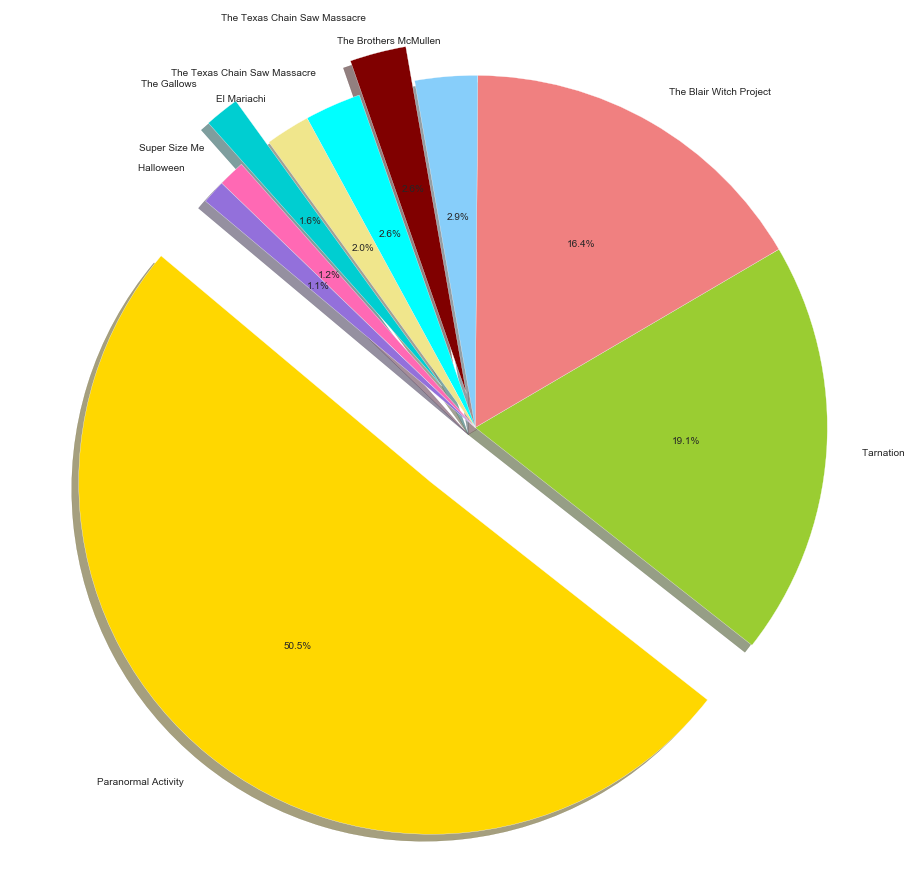

In [475]:
plt.figure(figsize=[16,16])

piereturn = dff[['movie_title','profit','budget','return_on_investment_perc', 'gross','imdb_score']];
piereturn = piereturn.sort_values(by=['return_on_investment_perc'], ascending = False).head(10);
explode = (0.2, 0, 0, 0, 0.1, 0, 0, 0.15, 0, 0)  # explode 1st slice


colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','maroon',  'aqua', 'khaki', 'darkturquoise', 'hotpink', 'mediumpurple']

plt.pie(piereturn['return_on_investment_perc'], labels=piereturn['movie_title'], explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')



In [476]:

piereturn = dff[['movie_title','profit','budget','return_on_investment_perc', 'gross','imdb_score']];
piereturn = piereturn.sort_values(by=['return_on_investment_perc'], ascending = False).head(20)
#px.scatter(piereturn, x="budget", y="return_on_investment_perc", text ='movie_title' , trendline="lowess")
piereturn

movie_title       profit     budget  \
4793              Paranormal Activity   107902283.0    15000.0   
4799                        Tarnation      591796.0      218.0   
4707          The Blair Witch Project   140470114.0    60000.0   
4984            The Brothers McMullen    10221600.0    25000.0   
4936     The Texas Chain Saw Massacre    30775468.0    83532.0   
3278     The Texas Chain Saw Massacre    30775468.0    83532.0   
5035                      El Mariachi     2033920.0     7000.0   
4956                      The Gallows    22657819.0   100000.0   
4977                    Super Size Me    11464368.0    65000.0   
4821                        Halloween    46700000.0   300000.0   
2492                        Halloween    46700000.0   300000.0   
4674                American Graffiti   114223000.0   777000.0   
4530                            Rocky   116275247.0   960000.0   
5011            In the Company of Men     2831622.0    25000.0   
4791                Napoleon Dynamite    44140956.0   400000.0   
4955                Facing the Giants    10074663.0   100000.0   
4449  Snow White and the Seven Dwarfs   182925485.0  2000000.0   
4725                            Benji    39052600.0   500000.0   
5042                My Date with Drew       84122.0     1100.0   
5027                       The Circle      663780.0    10000.0   

      return_on_investment_perc        gross  imdb_score  
4793              719348.553333  107917283.0         6.3  
4799              271466.055046     592014.0         7.2  
4707              234116.856667  140530114.0         6.4  
4984               40886.400000   10246600.0         6.6  
4936               36842.728535   30859000.0         7.5  
3278               36842.728535   30859000.0         7.5  
5035               29056.000000    2040920.0         6.9  
4956               22657.819000   22757819.0         4.2  
4977               17637.489231   11529368.0         7.3  
4821               15566.666667   47000000.0         7.9  
2492               15566.666667   47000000.0         7.9  
4674               14700.514801  115000000.0         7.5  
4530               12112.004896  117235247.0         8.1  
5011               11326.488000    2856622.0         7.3  
4791               11035.239000   44540956.0         6.9  
4955               10074.663000   10174663.0         6.7  
4449                9146.274250  184925485.0         7.7  
4725                7810.520000   39552600.0         6.1  
5042                7647.454545      85222.0         6.6  
5027                6637.800000     673780.0         7.5

## Is language an important factor for imdb score? What about country?


In [477]:
#let's get some general information from language and country
dff['language'].value_counts().head(15)

English       3566
French          34
Spanish         23
Mandarin        14
Japanese        10
German          10
Italian          7
Cantonese        7
Hindi            5
Korean           5
Portuguese       5
Norwegian        4
Thai             3
Danish           3
Dutch            3
Name: language, dtype: int64

## Three persian movies on the list. Intresting!
### I'm Persian

In [478]:
dff['country'].value_counts().head(20)

USA            2961
UK              313
France          101
Germany          79
Canada           59
Australia        39
Spain            21
Japan            15
Hong Kong        13
China            12
Italy            11
New Zealand      11
Denmark           8
South Korea       8
Ireland           7
Mexico            6
India             5
Brazil            5
Norway            4
Iran              4
Name: country, dtype: int64

## There are 4 movies from Iran and 3 movies in persian! something might be wrong or might be one movie in Kurdish, Azeri or other Iranian trib's language

## Dig into Iranian and Persian movies

In [479]:
e = dff.loc[df['country'] == 'Iran']
e.groupby(['movie_title','imdb_score'])['profit'].sum().sort_values(ascending=False).head()

movie_title          imdb_score
A Separation         8.4            6598492.0
Children of Heaven   8.5             745402.0
The Circle           7.5             663780.0
Caravans             6.5          -13000000.0
Name: profit, dtype: float64

In [480]:
e = dff.loc[df['language'] == 'Persian']
e.groupby(['movie_title','imdb_score'])['profit'].sum().sort_values(ascending=False).head()

movie_title          imdb_score
A Separation         8.4           6598492.0
Children of Heaven   8.5            745402.0
The Circle           7.5            663780.0
Name: profit, dtype: float64

## Ok now I found the problem. Caravans was shot in Afghanistan and iran and starred Anthony Quinn, Jennifer O'Neill, and Michael Sarrazin.



In [481]:
# I want to draw pareto chart

def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots()
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

In [482]:
pareto = dff.sort_values(by=['budget'], ascending = False).head(8)


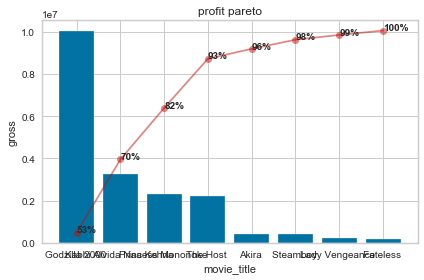

In [483]:
pareto_plot(pareto, x='movie_title', y='gross', title='profit pareto')


In [484]:
dff.groupby(['movie_title','imdb_score'])['profit'].sum().sort_values(ascending=False).head(10)

movie_title                                 imdb_score
Avatar                                      7.9           523505847.0
Jurassic World                              7.0           502177271.0
Titanic                                     7.7           458672302.0
Star Wars: Episode IV - A New Hope          8.7           449935665.0
E.T. the Extra-Terrestrial                  7.9           424449459.0
The Avengers                                8.1           403279547.0
The Lion King                               8.5           377783777.0
The Jungle Book                             7.8           375290282.0
Star Wars: Episode I - The Phantom Menace   6.5           359544677.0
The Dark Knight                             9.0           348316061.0
Name: profit, dtype: float64

In [485]:
dff.groupby(['movie_title','profit'])['imdb_score'].sum().sort_values(ascending=False).head(10)

movie_title           profit      
King Kong              11051260.0     21.6
Home                   42343675.0     20.1
Casino Royale          17007184.0     16.0
Glory                  8830000.0      15.8
Halloween              46700000.0     15.8
The Jungle Book        187645141.0    15.6
Lucky Number Slevin   -4505513.0      15.6
Skyfall                104360277.0    15.6
Juno                   135992840.0    15.0
Eddie the Eagle       -7214368.0      15.0
Name: imdb_score, dtype: float64

## woww. "Eddie the Eagle" with negative profit had a great score! That doesn't make sense! Maybe their marketin was not good!

In [486]:
fig = px.scatter(dff, x="imdb_score", y="gross")

fig.add_trace(
    go.Scatter(
        x=[8, 8],
        y=[0, 800000000],
        mode="lines",
        line=go.scatter.Line(color="gray"),
        showlegend=False)
)
fig.add_trace(
    go.Scatter(
        x=[1, 10],
        y=[500000000, 500000000],
        mode="lines",
        line=go.scatter.Line(color="gray"),
        showlegend=False)
)
fig.show()

In [487]:
fig = px.scatter(pieprofit, x="imdb_score", y="gross", text ='movie_title')

fig.add_trace(
    go.Scatter(
        x=[8, 8],
        y=[50000000, 800000000],
        mode="lines",
        line=go.scatter.Line(color="gray"),
        showlegend=False)
)
fig.add_trace(
    go.Scatter(
        x=[6, 9],
        y=[500000000, 500000000],
        mode="lines",
        line=go.scatter.Line(color="gray"),
        showlegend=False)
)
fig.show()

### So Avatar had the best profit but The Dark Night had the best IMDB score!

In [488]:
df1 = dff
# setting my own values for bins
df1['imdbscores_bins'] = pd.cut(df1['imdb_score'], bins=[0, 2, 4, 6, 8, 10], labels=['0-1.99', '2-3.99', '4-5.99', '6-7.99', '8-10'],
                   include_lowest=True)
# see the result
df1.head()

C:\Users\mnajjartabar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
5  Color     Andrew Stanton                   462.0     132.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
5                    475.0                   530.0   Samantha Morton   

   actor_1_facebook_likes        gross     actor_1_name  ... content_rating  \
0                  1000.0  760505847.0      CCH Pounder  ...          PG-13   
1                 40000.0  309404152.0      Johnny Depp  ...          PG-13   
2                 11000.0  200074175.0  Christoph Waltz  ...          PG-13   
3                 27000.0  448130642.0        Tom Hardy  ...          PG-13   
5                   640.0   73058679.0     Daryl Sabara  ...          PG-13   

        budget  title_year actor_2_facebook_likes  imdb_score aspect_ratio  \
0  237000000.0      2009.0                  936.0         7.9         1.78   
1  300000000.0      2007.0                 5000.0         7.1         2.35   
2  245000000.0      2015.0                  393.0         6.8         2.35   
3  250000000.0      2012.0                23000.0         8.5         2.35   
5  263700000.0      2012.0                  632.0         6.6         2.35   

  movie_facebook_likes       profit return_on_investment_perc imdbscores_bins  
0                33000  523505847.0                220.888543          6-7.99  
1                    0    9404152.0                  3.134717          6-7.99  
2                85000  -44925825.0                -18.337071          6-7.99  
3               164000  198130642.0                 79.252257            8-10  
5                24000 -190641321.0                -72.294775          6-7.99  

[5 rows x 30 columns]

### Here I made bins for IMDB scores and changed their name.

In [489]:
#labels=['trash', 'tolerable', 'good', 'accaptable', 'incredible', 'unbelievable']
df1 = df1.replace({'imdbscores_bins': "6-7.99"}, {'imdbscores_bins': 'incredible'})
df1 = df1.replace({'imdbscores_bins': "0-1.99"}, {'imdbscores_bins': 'trash'})
df1 = df1.replace({'imdbscores_bins': "2-3.99"}, {'imdbscores_bins': 'tolerable'})
df1 = df1.replace({'imdbscores_bins': "4-5.99"}, {'imdbscores_bins': 'accaptable'})
df1 = df1.replace({'imdbscores_bins': "8-10"}, {'imdbscores_bins': 'unbelievable'})
df1.head()


color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
5  Color     Andrew Stanton                   462.0     132.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
5                    475.0                   530.0   Samantha Morton   

   actor_1_facebook_likes        gross     actor_1_name  ... content_rating  \
0                  1000.0  760505847.0      CCH Pounder  ...          PG-13   
1                 40000.0  309404152.0      Johnny Depp  ...          PG-13   
2                 11000.0  200074175.0  Christoph Waltz  ...          PG-13   
3                 27000.0  448130642.0        Tom Hardy  ...          PG-13   
5                   640.0   73058679.0     Daryl Sabara  ...          PG-13   

        budget  title_year actor_2_facebook_likes  imdb_score aspect_ratio  \
0  237000000.0      2009.0                  936.0         7.9         1.78   
1  300000000.0      2007.0                 5000.0         7.1         2.35   
2  245000000.0      2015.0                  393.0         6.8         2.35   
3  250000000.0      2012.0                23000.0         8.5         2.35   
5  263700000.0      2012.0                  632.0         6.6         2.35   

  movie_facebook_likes       profit return_on_investment_perc imdbscores_bins  
0                33000  523505847.0                220.888543      incredible  
1                    0    9404152.0                  3.134717      incredible  
2                85000  -44925825.0                -18.337071      incredible  
3               164000  198130642.0                 79.252257    unbelievable  
5                24000 -190641321.0                -72.294775      incredible  

[5 rows x 30 columns]

In [490]:
fig = px.scatter_3d(dff, x='return_on_investment_perc', y='country', z='imdb_score')
fig.show()

In [491]:
fig = px.scatter_3d(df1, x='return_on_investment_perc', y='country', z='imdbscores_bins')
fig.show()

### a huge number of movies has imdb better than 8 which I named as incredible

In [492]:

fig = px.scatter_3d(pieprofit, x='profit', y='return_on_investment_perc', z='imdb_score', text = 'movie_title')
fig.show()

In [493]:
fig = px.scatter(dff, x="country", y="imdb_score", marginal_y="rug", marginal_x="histogram")
fig.show()


In [494]:
fig = px.scatter(dff, x="gross", y="imdb_score", marginal_y="violin",
           marginal_x="box", trendline="ols")
fig.show()

C:\Users\mnajjartabar\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [495]:
plt.figure(figsize=[24,16])
fig = px.scatter_matrix(dff, dimensions=["imdb_score", "actor_1_facebook_likes", "actor_2_facebook_likes"])
fig.show()

<Figure size 1728x1152 with 0 Axes>

### I don't see any strong relations between actors facebook likes and imdb score

In [496]:
df1['imdbscores_bins'].value_counts().head()

incredible      2435
accaptable      1041
unbelievable     156
tolerable         87
trash              4
Name: imdbscores_bins, dtype: int64

In [497]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 0 to 5042
Data columns (total 30 columns):
color                        3723 non-null object
director_name                3723 non-null object
num_critic_for_reviews       3723 non-null float64
duration                     3723 non-null float64
director_facebook_likes      3723 non-null float64
actor_3_facebook_likes       3723 non-null float64
actor_2_name                 3723 non-null object
actor_1_facebook_likes       3723 non-null float64
gross                        3723 non-null float64
actor_1_name                 3723 non-null object
movie_title                  3723 non-null object
num_voted_users              3723 non-null int64
cast_total_facebook_likes    3723 non-null int64
actor_3_name                 3723 non-null object
facenumber_in_poster         3723 non-null float64
plot_keywords                3723 non-null object
movie_imdb_link              3723 non-null object
num_user_for_reviews         3723 non-

In [498]:

fig = px.parallel_coordinates(dff, color="imdb_score", labels={"actor_1_facebook_likes": "Actor 1 likes",
                  "actor_2_facebook_likes": "Actor 2 likes", "actor_3_facebook_likes": "Actor 3 likes",
                  "director_facebook_likes": "Director likes", },
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()

In [499]:
earth = dff.groupby(['country', 'gross'])['title_year'].sum(
).sort_values()
earth.head()

country  gross    
Germany  26435.0      1927.0
USA      2808000.0    1929.0
         2300000.0    1933.0
         3000000.0    1935.0
         163245.0     1936.0
Name: title_year, dtype: float64

In [500]:
earth2=dff.pivot_table(index=['country','title_year'], values='gross', 
                   aggfunc='sum', fill_value=0, margins=True).reset_index()
#earth2=earth2['country'].value_counts()

earth2.head()

country title_year     gross
0  Afghanistan       2003   1127331
1    Argentina       2000   1221261
2    Argentina       2004    304124
3    Argentina       2009  20167424
4        Aruba       1998  10076136

In [501]:

fig = px.choropleth(earth2, locations="country", color="gross", hover_name="country", animation_frame="title_year", range_color=[0,999999999])
fig.show()

### I gave a shot but didn't work. Didn't have enough time otherwise I could make it

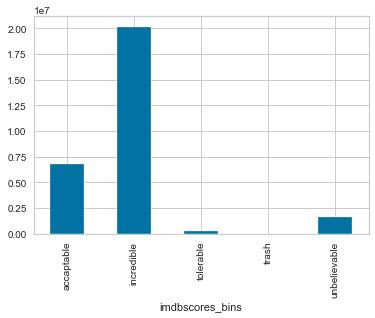

In [502]:
#dff.groupby('imdb_score').hist(figsize=(10,10));
df1.groupby('imdbscores_bins')['actor_1_facebook_likes'].sum().plot.bar();






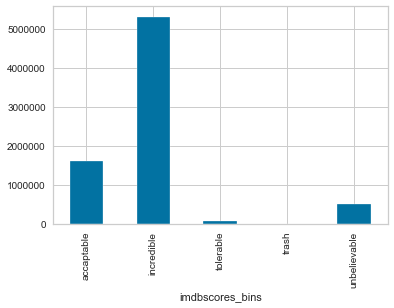

In [503]:
df1.groupby('imdbscores_bins')['actor_2_facebook_likes'].sum().plot.bar();


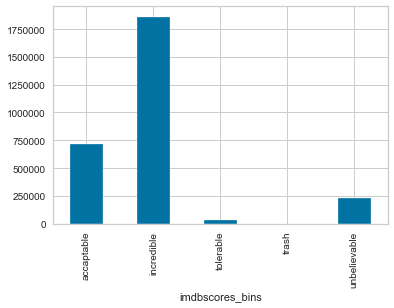

In [504]:
df1.groupby('imdbscores_bins')['actor_3_facebook_likes'].sum().plot.bar();


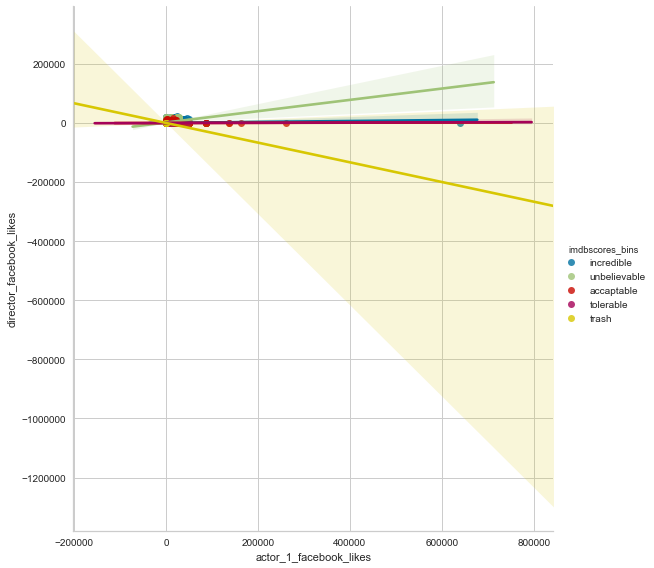

In [505]:
sns.lmplot("actor_1_facebook_likes", "director_facebook_likes", df1, hue="imdbscores_bins", x_jitter=.15, height=8)

## Now check each variable with imdb score

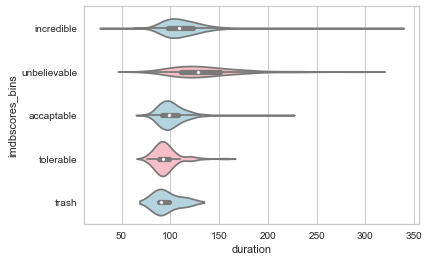

In [506]:
#ff.groupby('imdbscores_bins')['duration'].sum().plot.bar();
sns.violinplot("duration", "imdbscores_bins", data=df1,
               palette=["lightblue", "lightpink"])


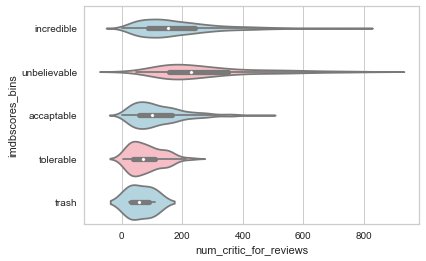

In [507]:
#dff.groupby('imdbscores_bins')['num_critic_for_reviews'].sum().plot.bar();
sns.violinplot("num_critic_for_reviews", "imdbscores_bins", data=df1,
               palette=["lightblue", "lightpink"])


# Correlation analysis

In [508]:
dffcorr = dff.corr()
dffcorr

num_critic_for_reviews  duration  \
num_critic_for_reviews                   1.000000  0.227619   
duration                                 0.227619  1.000000   
director_facebook_likes                  0.175715  0.180397   
actor_3_facebook_likes                   0.245440  0.120776   
actor_1_facebook_likes                   0.165648  0.082901   
gross                                    0.460797  0.242610   
num_voted_users                          0.591586  0.338953   
cast_total_facebook_likes                0.233781  0.117736   
facenumber_in_poster                    -0.035603  0.027522   
num_user_for_reviews                     0.562596  0.352083   
budget                                   0.103921  0.067380   
title_year                               0.420184 -0.131689   
actor_2_facebook_likes                   0.251119  0.126651   
imdb_score                               0.349825  0.367388   
aspect_ratio                             0.179809  0.153353   
movie_facebook_likes                     0.703579  0.212977   
profit                                   0.037177  0.007119   
return_on_investment_perc                0.032508 -0.033647   

                           director_facebook_likes  actor_3_facebook_likes  \
num_critic_for_reviews                    0.175715                0.245440   
duration                                  0.180397                0.120776   
director_facebook_likes                   1.000000                0.120584   
actor_3_facebook_likes                    0.120584                1.000000   
actor_1_facebook_likes                    0.090467                0.252450   
gross                                     0.139729                0.281238   
num_voted_users                           0.302766                0.257632   
cast_total_facebook_likes                 0.120076                0.485596   
facenumber_in_poster                     -0.047577                0.104853   
num_user_for_reviews                      0.218876                0.200485   
budget                                    0.018105                0.038207   
title_year                               -0.045718                0.116479   
actor_2_facebook_likes                    0.117858                0.550328   
imdb_score                                0.193125                0.064187   
aspect_ratio                              0.037171                0.047918   
movie_facebook_likes                      0.162641                0.259922   
profit                                    0.024457                0.047490   
return_on_investment_perc                -0.006550               -0.012651   

                           actor_1_facebook_likes     gross  num_voted_users  \
num_critic_for_reviews                   0.165648  0.460797         0.591586   
duration                                 0.082901  0.242610         0.338953   
director_facebook_likes                  0.090467  0.139729         0.302766   
actor_3_facebook_likes                   0.252450  0.281238         0.257632   
actor_1_facebook_likes                   1.000000  0.142577         0.178009   
gross                                    0.142577  1.000000         0.622714   
num_voted_users                          0.178009  0.622714         1.000000   
cast_total_facebook_likes                0.946075  0.227955         0.243834   
facenumber_in_poster                     0.055769 -0.034389        -0.035822   
num_user_for_reviews                     0.121393  0.545656         0.779191   
budget                                   0.016027  0.098318         0.065398   
title_year                               0.095997  0.053163         0.023488   
actor_2_facebook_likes                   0.390411  0.243977         0.239126   
imdb_score                               0.092927  0.215510         0.482583   
aspect_ratio                             0.056816  0.065903         0.087079   
movie_facebook_likes                     0.128804  0.358630       

In [509]:
dffcorr ['imdb_score']

num_critic_for_reviews       0.349825
duration                     0.367388
director_facebook_likes      0.193125
actor_3_facebook_likes       0.064187
actor_1_facebook_likes       0.092927
gross                        0.215510
num_voted_users              0.482583
cast_total_facebook_likes    0.105397
facenumber_in_poster        -0.067010
num_user_for_reviews         0.325026
budget                       0.029462
title_year                  -0.132274
actor_2_facebook_likes       0.100290
imdb_score                   1.000000
aspect_ratio                 0.031060
movie_facebook_likes         0.284034
profit                       0.036209
return_on_investment_perc    0.010068
Name: imdb_score, dtype: float64

### So briefly we can see here that num_critic_for_reviews, duration, num_voted_users, num_user_for_reviews, and movie_facebook_likes are highly positive correlated to imdb score and title year is negativly and relativly correlated which means people probably won't like the most recent movies as much as they liked old movies but probably fact is each movies takes times to get more viewers and increase imdb score and older movies had enough time for that

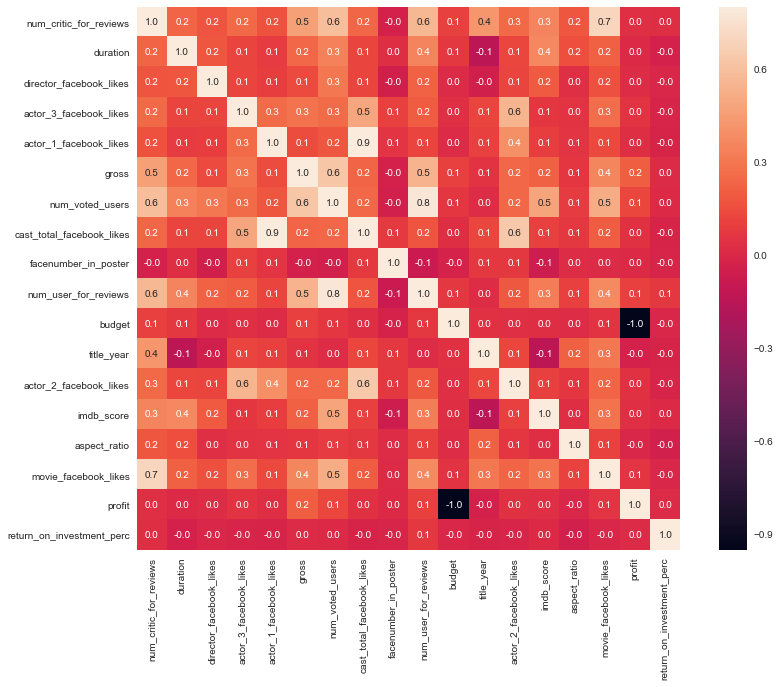

In [510]:
plt.figure(figsize=(14,10))
sns.heatmap(dff.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

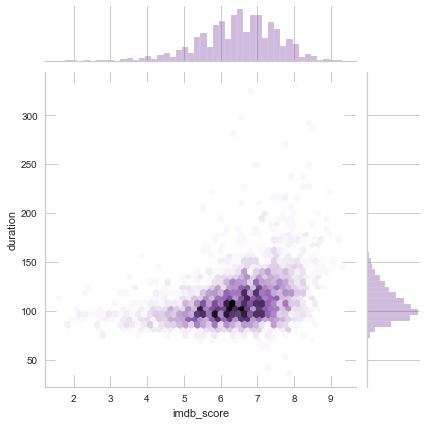

In [511]:
sns.jointplot("imdb_score", "duration", dff, kind="hex", color="#8855AA")

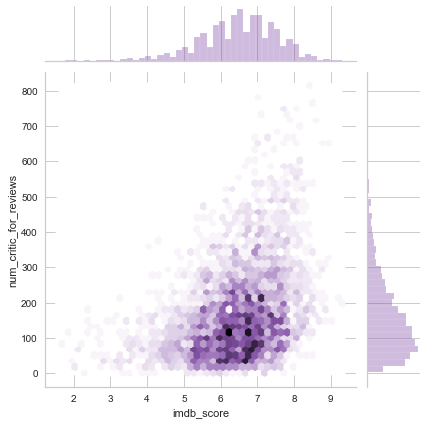

In [512]:
sns.jointplot("imdb_score", "num_critic_for_reviews", dff, kind="hex", color="#8855AA")

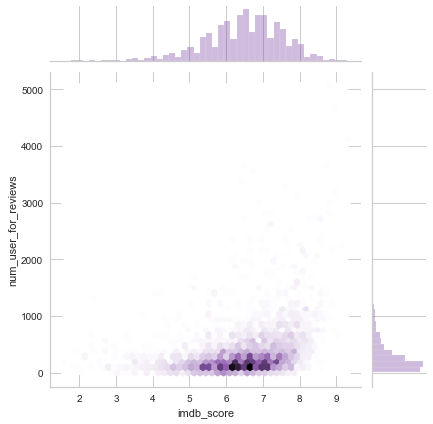

In [513]:
sns.jointplot("imdb_score", "num_user_for_reviews", dff, kind="hex", color="#8855AA")

# ANOVA test

In [514]:

cw_lm=ols('imdb_score ~ num_critic_for_reviews + duration + director_facebook_likes + actor_3_facebook_likes + actor_1_facebook_likes + gross + num_voted_users + cast_total_facebook_likes + facenumber_in_poster + num_user_for_reviews + budget + actor_2_facebook_likes + actor_2_facebook_likes + aspect_ratio + movie_facebook_likes + profit + return_on_investment_perc', 
          data=dff).fit() #Specify C for Categorical
print(sm.stats.anova_lm(cw_lm, typ=2))

                                sum_sq      df            F         PR(>F)
num_critic_for_reviews       58.182211     1.0    78.579237   1.170908e-18
duration                    245.302714     1.0   331.298859   5.670390e-71
director_facebook_likes       1.336854     1.0     1.805517   1.791292e-01
actor_3_facebook_likes        8.703798     1.0    11.755102   6.133820e-04
actor_1_facebook_likes       23.520899     1.0    31.766656   1.868087e-08
gross                      1718.646718     1.0  2321.155306   0.000000e+00
num_voted_users             382.360667     1.0   516.405427  3.893240e-107
cast_total_facebook_likes    23.263381     1.0    31.418860   2.231108e-08
facenumber_in_poster         14.582572     1.0    19.694807   9.349008e-06
num_user_for_reviews         73.443748     1.0    99.191034   4.458689e-23
budget                     1700.292273     1.0  2296.366317   0.000000e+00
actor_2_facebook_likes       22.150485     1.0    29.915814   4.810391e-08
aspect_ratio             

In [515]:
'num_critic_for_reviews', 'duration', 'num_voted_users', 'num_user_for_reviews', 'movie_facebook_likes'

('num_critic_for_reviews',
 'duration',
 'num_voted_users',
 'num_user_for_reviews',
 'movie_facebook_likes')

## ANOVA interpretation

### Instead of doing several t-test I did one ANOVA test with imdb score as response. 
### The ANOVA table shows only director_facebook_likes and return_on_investment_perc (which I made later) are not significant and the rest values are significant to predict IMDB score

# Story telling

## This data sets gives us a very usefull information about IMDB scores of 5000 movies and their other related factors on the IMDB scors. These information gives us this opportunity to see what factor potentially gives high score to a movie and what factor is not important. The data set contained the following columns. To have better judgment about value of a movie in terms of money, I calculated profit (gross income - budget) later and added to the current columns


## First of all to have a reliable analysis we need a reliable data set and to make sure we have a reliable data set we need to prepare our data. By inspecting data we noticed that we have some missing (as NaN or zero values) and duplicated values. after cleaning our data set shrinked to about 3700 movies which is still a big data set to do analysis. Also almost all of movies are color and just 123 of them are black and white. we can remove color column here but personally I don't like miss any information so I'll keep it.

## Here is some analysis:
- This data set contain movies from several contries. USA, France, Germany, Canada, Australia, Spain, Japan, Hong Kong, China, Italy, New Zealand, South Korea, Denmark, Ireland, Mexico, Brazil, India, Iran and Norway are first 20 countries in this list.
- Interesting point about countries is India with that big Bollywood has just 5 movies in this list and countries Iran has 4 movies. Just a general information I know Bollywood makes more movies than Hollywood in a year! 
- My client were more interested about movies from Iran so I digged into it and I found the names. There was 4 movies from Iran but 3 movuies in persian and that was because one old movie made in Iran and Afghanestan and mostly in English.
- Checking profit and IMDB score showed that a movie (Eddie the Eagle) had negative profit with IMDB score of 15 which was really high!!!
- Avatar had the best profit but The Dark Night had the best IMDB score!
- A huge number of movies has imdb better than 8 which I named as incredible
-  I didn't see any strong relations between actors facebook likes and imdb score
- Correlation analysis showed that num_critic_for_reviews, duration, num_voted_users, num_user_for_reviews, and movie_facebook_likes are highly positive correlated to imdb score and title year is negativly and relativly correlated which means people probably won't like the most recent movies as much as they liked old movies but probably fact is each movies takes times to get more viewers and increase imdb score and older movies had enough time for that
- that num_critic_for_reviews, duration, num_voted_users, num_user_for_reviews, and movie_facebook_likes are highly positive correlated to imdb score and title year is negativly and relativly correlated which means people probably won't like the most recent movies as much as they liked old movies but probably fact is each movies takes times to get more viewers and increase imdb score and older movies had enough time for that.

### More analysis has been provided in the report.

# Final Project

In [516]:
#df0 = df[['movie_title','genres', 'title_year', 'gross', 'duration', 'imdb_score']];

In [517]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 5042
Data columns (total 28 columns):
color                        4979 non-null object
director_name                4895 non-null object
num_critic_for_reviews       4949 non-null float64
duration                     4983 non-null float64
director_facebook_likes      4895 non-null float64
actor_3_facebook_likes       4975 non-null float64
actor_2_name                 4985 non-null object
actor_1_facebook_likes       4991 non-null float64
gross                        4124 non-null float64
genres                       4998 non-null object
actor_1_name                 4991 non-null object
movie_title                  4998 non-null object
num_voted_users              4998 non-null int64
cast_total_facebook_likes    4998 non-null int64
actor_3_name                 4975 non-null object
facenumber_in_poster         4985 non-null float64
plot_keywords                4846 non-null object
movie_imdb_link              4998 non-

In [518]:
dfff = df.dropna()

In [519]:
dfff = dfff[['gross', 'duration', 'aspect_ratio', 'num_critic_for_reviews', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes', 'num_user_for_reviews', 'budget', 'actor_2_facebook_likes', 'imdb_score']];

In [520]:
dffff = dfff[['gross', 'budget','num_user_for_reviews','imdb_score']];

In [521]:
k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)

In [522]:
k_means.fit(dfff)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

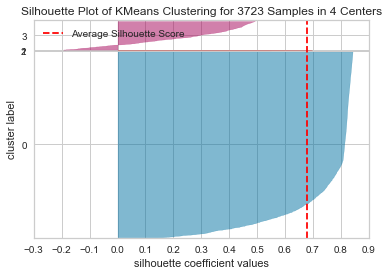

In [523]:

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
visualizer = SilhouetteVisualizer(k_means, colors='yellowbrick')

visualizer.fit(dfff)        # Fit the data to the visualizer
visualizer.show()        

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

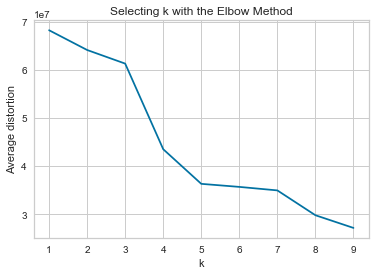

In [524]:
from scipy.spatial.distance import cdist 

K = range(1, 10) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k, random_state=1) 
    kmeans.fit(dfff) 
    meandistortions.append(sum(np.min(cdist(dfff, kmeans.cluster_centers_, 'euclidean'), axis=1)) / dfff.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 

In [525]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import the scatter_matrix functionality
from pandas.plotting import scatter_matrix
import plotly.graph_objects as go
import plotly.express as px
import pingouin as pg
import statsmodels.api as sm
from statsmodels.formula.api import ols

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE


from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

### The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.



In [526]:
range_n_clusters = list (range(2,10))
print ("Number of clusters from 2 to 9: \n", range_n_clusters)



Number of clusters from 2 to 9: 
 [2, 3, 4, 5, 6, 7, 8, 9]


In [527]:
from sklearn.metrics import silhouette_score

for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(dfff)
    centers = clusterer.cluster_centers_

    score = silhouette_score (dfff, preds, metric='euclidean')
#   print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score)



In [528]:
# Anova test

cw_lm2=ols('imdb_score ~ num_critic_for_reviews + duration + num_voted_users + num_user_for_reviews + movie_facebook_likes', 
          data=dff).fit() #Specify C for Categorical
print(sm.stats.anova_lm(cw_lm2, typ=2))

                             sum_sq      df           F        PR(>F)
num_critic_for_reviews    44.453784     1.0   57.483265  4.279843e-14
duration                 224.778891     1.0  290.661974  8.220168e-63
num_voted_users          361.807023     1.0  467.853290  7.976836e-98
num_user_for_reviews      79.180650     1.0  102.388636  9.243716e-24
movie_facebook_likes       7.989624     1.0   10.331397  1.319048e-03
Residual                2874.483803  3717.0         NaN           NaN


In [529]:
runs_reg_model1 = ols("imdb_score ~ num_critic_for_reviews + duration + num_voted_users + num_user_for_reviews + movie_facebook_likes",dff)
runs_reg1 = runs_reg_model1.fit()
print(runs_reg1.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     325.2
Date:                Mon, 09 Dec 2019   Prob (F-statistic):          1.26e-289
Time:                        09:00:49   Log-Likelihood:                -4801.2
No. Observations:                3723   AIC:                             9614.
Df Residuals:                    3717   BIC:                             9652.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

In [530]:
runs_reg1.mse_resid

0.7733343564000075

In [531]:
runs_reg_model = ols("imdb_score ~ profit",dff)
runs_reg2 = runs_reg_model.fit()
print(runs_reg1.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     325.2
Date:                Mon, 09 Dec 2019   Prob (F-statistic):          1.26e-289
Time:                        09:00:49   Log-Likelihood:                -4801.2
No. Observations:                3723   AIC:                             9614.
Df Residuals:                    3717   BIC:                             9652.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

In [532]:
runs_reg2.mse_resid

1.1090070967023982

In [533]:
runs_reg_model = ols("imdb_score ~ num_critic_for_reviews",dff)
runs_reg3 = runs_reg_model.fit()
print(runs_reg1.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     325.2
Date:                Mon, 09 Dec 2019   Prob (F-statistic):          1.26e-289
Time:                        09:00:49   Log-Likelihood:                -4801.2
No. Observations:                3723   AIC:                             9614.
Df Residuals:                    3717   BIC:                             9652.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

In [534]:
runs_reg3.mse_resid

0.97456765259219

In [535]:
runs_reg_model = ols("imdb_score ~ duration",dff)
runs_reg4 = runs_reg_model.fit()
print(runs_reg1.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     325.2
Date:                Mon, 09 Dec 2019   Prob (F-statistic):          1.26e-289
Time:                        09:00:50   Log-Likelihood:                -4801.2
No. Observations:                3723   AIC:                             9614.
Df Residuals:                    3717   BIC:                             9652.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

In [536]:
runs_reg4.mse_resid

0.9605795086146524

In [537]:
runs_reg_model = ols("imdb_score ~ num_voted_users",dff)
runs_reg5 = runs_reg_model.fit()
print(runs_reg1.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     325.2
Date:                Mon, 09 Dec 2019   Prob (F-statistic):          1.26e-289
Time:                        09:00:50   Log-Likelihood:                -4801.2
No. Observations:                3723   AIC:                             9614.
Df Residuals:                    3717   BIC:                             9652.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

In [538]:
runs_reg5.mse_resid

0.8518515801216262

In [539]:
runs_reg_model = ols("imdb_score ~ num_user_for_reviews",dff)
runs_reg6 = runs_reg_model.fit()
print(runs_reg1.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     325.2
Date:                Mon, 09 Dec 2019   Prob (F-statistic):          1.26e-289
Time:                        09:00:50   Log-Likelihood:                -4801.2
No. Observations:                3723   AIC:                             9614.
Df Residuals:                    3717   BIC:                             9652.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

In [540]:
runs_reg6.mse_resid

0.9931515713762974

In [541]:
runs_reg_model = ols("imdb_score ~ movie_facebook_likes",dff)
runs_reg7 = runs_reg_model.fit()
print(runs_reg1.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     325.2
Date:                Mon, 09 Dec 2019   Prob (F-statistic):          1.26e-289
Time:                        09:00:50   Log-Likelihood:                -4801.2
No. Observations:                3723   AIC:                             9614.
Df Residuals:                    3717   BIC:                             9652.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

In [542]:
runs_reg7.mse_resid

1.0208759991455945

## Regression model based on regularization

In [543]:
df5 = dff[['imdb_score', 'num_critic_for_reviews','duration','num_voted_users','num_user_for_reviews', 'movie_facebook_likes']];

In [544]:

y = df5['imdb_score'] 

X = df5.drop(['imdb_score'], axis =1)

model1 = linear_model.Lasso(alpha=1)           
model1.fit(X, y)
model1_y = model1.predict(X)

print('Coefficients: ', model1.coef_)
print("y-intercept ", model1.intercept_)

Coefficients:  [ 1.20306748e-03  9.36447631e-03  3.60658505e-06 -5.36915979e-04
 -2.35245025e-06]
y-intercept  5.053686732988178


In [545]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('num_critic_for_reviews', '0.001'),
 ('duration', '0.009'),
 ('num_voted_users', '0.000'),
 ('num_user_for_reviews', '-0.001'),
 ('movie_facebook_likes', '-0.000')]

In [546]:
print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y))

mean square error:  0.774667126355074
variance or r-squared:  0.30201774314687235


## b) Regression model based on Feature selection

In [547]:
X_new = SelectKBest(f_regression, k=2).fit_transform(X, y)
X_new

array([[1.78000e+02, 8.86204e+05],
       [1.69000e+02, 4.71220e+05],
       [1.48000e+02, 2.75868e+05],
       ...,
       [7.70000e+01, 7.26390e+04],
       [8.10000e+01, 5.20550e+04],
       [9.00000e+01, 4.28500e+03]])

In [548]:
# this helps us find out which variables are selected

selector = SelectKBest(f_regression, k=2).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[1 2]


In [549]:
X.head(5)

num_critic_for_reviews  duration  num_voted_users  num_user_for_reviews  \
0                   723.0     178.0           886204                3054.0   
1                   302.0     169.0           471220                1238.0   
2                   602.0     148.0           275868                 994.0   
3                   813.0     164.0          1144337                2701.0   
5                   462.0     132.0           212204                 738.0   

   movie_facebook_likes  
0                 33000  
1                     0  
2                 85000  
3                164000  
5                 24000

In [550]:
model2 = lm.LinearRegression()
model2.fit(X_new, y)
model2_y = model2.predict(X_new)

print("mean square error: ", mean_squared_error(y, model2_y))
print("variance or r-squared: ", explained_variance_score(y, model2_y))

mean square error:  0.7993049500041615
variance or r-squared:  0.2798188358104363


In [551]:
selector = SelectKBest(f_regression, k=3).fit(X, y)
idxs_selected = selector.get_support(indices=True)

model3 = lm.LinearRegression()
model3.fit(X_new, y)
model3_y = model3.predict(X_new)

print("mean square error: ", mean_squared_error(y, model3_y))
print("variance or r-squared: ", explained_variance_score(y, model3_y))

mean square error:  0.7993049500041615
variance or r-squared:  0.2798188358104363


In [552]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.metrics import pairwise_distances

In [553]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)
agg.labels_

array([2, 0, 0, ..., 1, 1, 1], dtype=int64)

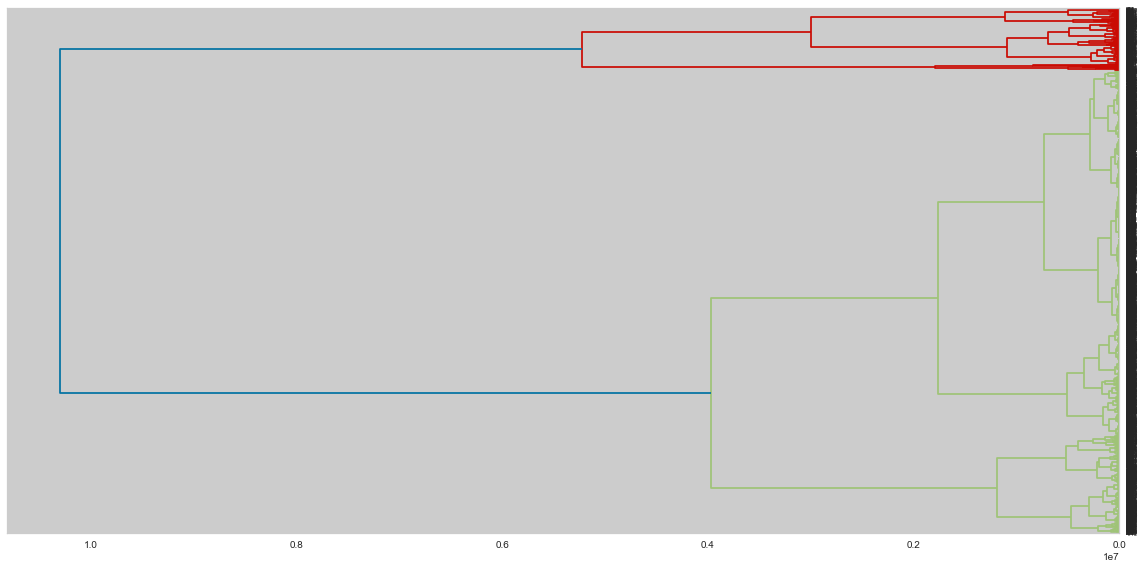

In [554]:
plt.figure(figsize=(16,8))

linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="left")
plt.tight_layout() # fixes margins

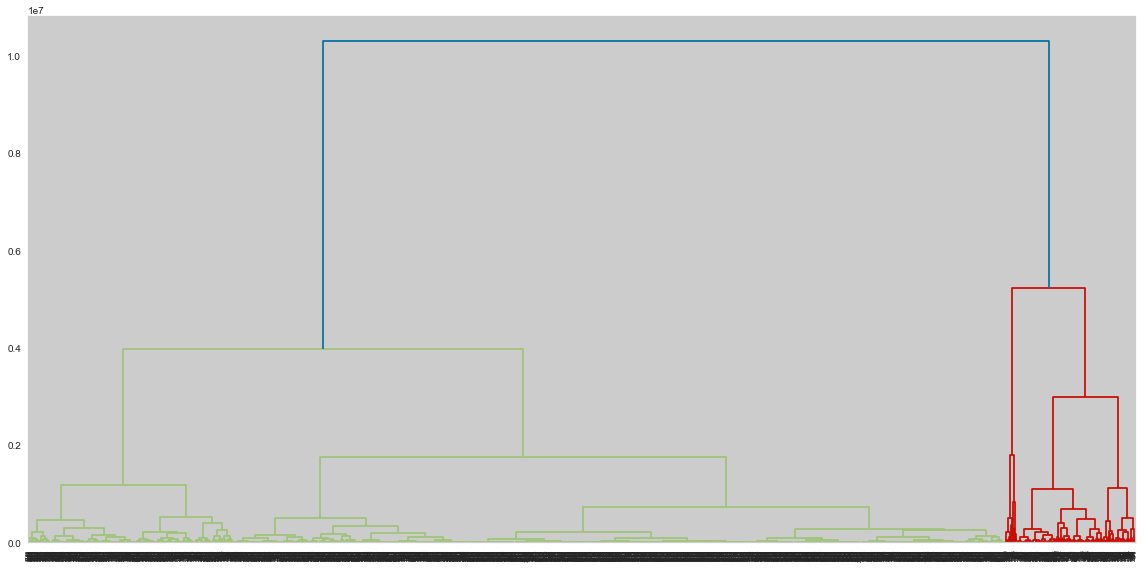

In [555]:
plt.figure(figsize=(16,8))

linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="top")
plt.tight_layout() # fixes margins

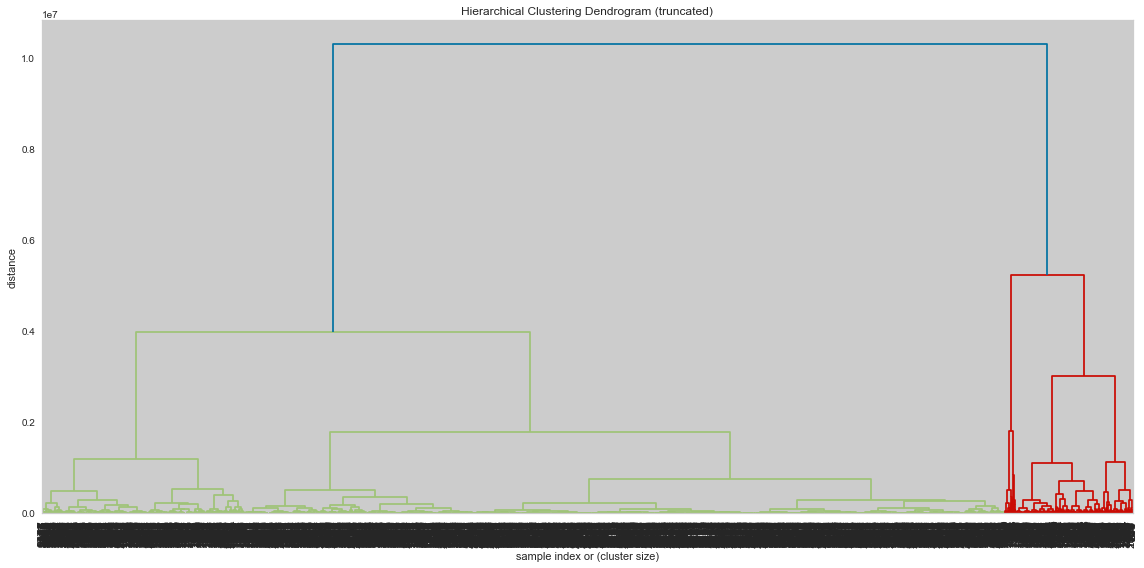

In [556]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           #truncate_mode='lastp',  # show only the last p merged clusters
           #p=12,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

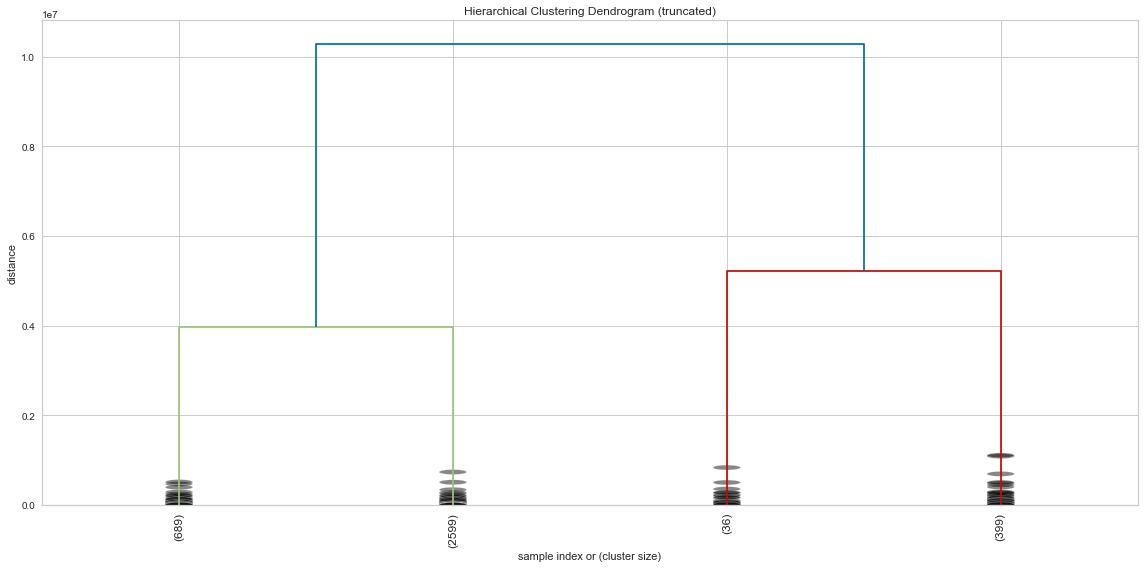

In [557]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=4,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

# PCA

In [558]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)  
print(pca.explained_variance_ratio_)  

print(pca.singular_values_)  

[0.98567396 0.01432292]
[9271556.45698948 1117639.63867542]


In [559]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X)                 


print(pca.explained_variance_ratio_)  

print(pca.singular_values_)  


[0.98567396 0.01432292]
[9271556.45698948 1117639.63867542]


In [560]:
pca = PCA(n_components=1, svd_solver='arpack')
pca.fit(X)  


print(pca.explained_variance_ratio_)  

print(pca.singular_values_)  

[0.98567396]
[9271556.45698948]


In [561]:
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=2, batch_size=3)
ipca.fit(X)

ipca.transform(X) 

array([[ 780278.84119654,  -33869.3526188 ],
       [ 363988.33745023,  -36210.38911611],
       [ 175428.51217363,   62949.45505415],
       ...,
       [ -32111.17196162,   12098.59667675],
       [ -54039.34710613,   -5333.44877396],
       [-101645.96566859,   -1359.84321136]])

# predict
df_predict = pd.read_csv("")
df_predict.head()

columns = df_predictd[['imdb_score', 'num_critic_for_reviews','duration','num_voted_users','num_user_for_reviews', 'movie_facebook_likes']];
model1.predict(columns)

In [562]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# grid search
from sklearn.model_selection import GridSearchCV


from sklearn.ensemble import RandomForestClassifier


In [563]:
df6 = dff.dropna()
df6 = df6[['imdbscores_bins', 'num_critic_for_reviews','duration','num_voted_users','num_user_for_reviews', 'movie_facebook_likes']];
y = df6['imdbscores_bins'] 

X = df6.drop(['imdbscores_bins'], axis =1)

In [583]:
df6 = df.dropna()
df6 = df6[['imdb_score', 'num_critic_for_reviews','duration','num_voted_users','num_user_for_reviews', 'movie_facebook_likes']];

# setting my own values for bins
df6['imdbscores_bins'] = pd.cut(df6['imdb_score'], bins=[0, 4, 6, 8, 10], labels=[1, 2, 3, 4],
                   include_lowest=True)
# see the result
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 0 to 5042
Data columns (total 7 columns):
imdb_score                3723 non-null float64
num_critic_for_reviews    3723 non-null float64
duration                  3723 non-null float64
num_voted_users           3723 non-null int64
num_user_for_reviews      3723 non-null float64
movie_facebook_likes      3723 non-null int64
imdbscores_bins           3723 non-null category
dtypes: category(1), float64(4), int64(2)
memory usage: 207.4 KB


In [584]:
df6 = df6.drop(['imdb_score'], axis =1)

In [585]:
df6['imdbscores_bins'] = df6.imdbscores_bins.astype(int)

df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 0 to 5042
Data columns (total 6 columns):
num_critic_for_reviews    3723 non-null float64
duration                  3723 non-null float64
num_voted_users           3723 non-null int64
num_user_for_reviews      3723 non-null float64
movie_facebook_likes      3723 non-null int64
imdbscores_bins           3723 non-null int32
dtypes: float64(3), int32(1), int64(2)
memory usage: 189.1 KB


In [586]:

y = df6['imdbscores_bins'] 

X = df6.drop(['imdbscores_bins'], axis =1)

In [587]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train);

In [588]:
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
#print(metrics.roc_auc_score(y_test, dt.predict(X_test)));


0.6204118173679498
--------------------------------------------------------
[[  5  16   9   0]
 [ 11 145 144   0]
 [ 16 181 515  22]
 [  0   2  23  28]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.16      0.17      0.16        30
           2       0.42      0.48      0.45       300
           3       0.75      0.70      0.72       734
           4       0.56      0.53      0.54        53

   micro avg       0.62      0.62      0.62      1117
   macro avg       0.47      0.47      0.47      1117
weighted avg       0.63      0.62      0.63      1117

--------------------------------------------------------


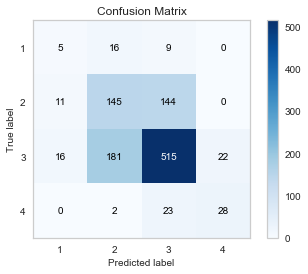

In [589]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

In [590]:
from sklearn.externals.six import StringIO

# install pydotplus first (if not already done)
import pydotplus

dot_data = StringIO() 
tree.export_graphviz(dt, out_file=dot_data, feature_names=X.columns,
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


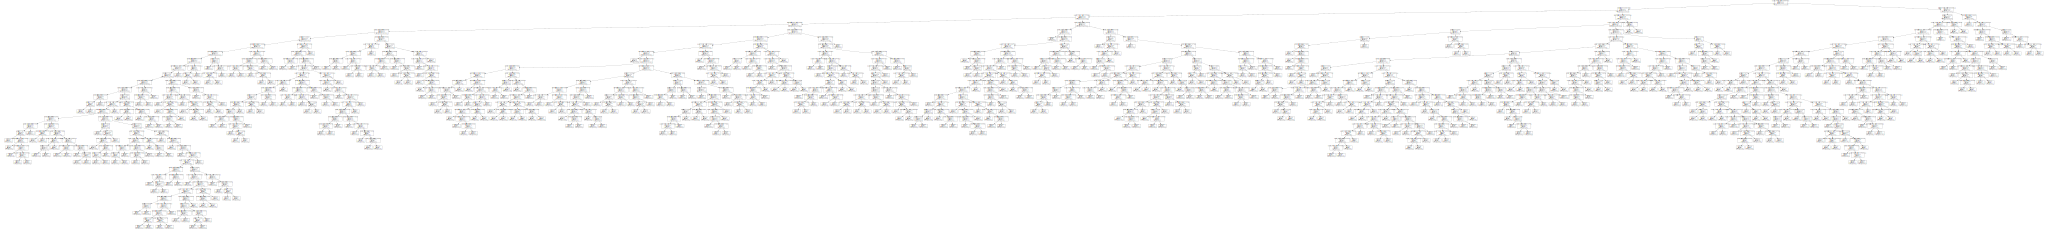

In [591]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(dt, out_file=None, feature_names=X.columns))

# b) KNN

In [592]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [593]:
print(metrics.accuracy_score(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, knn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
#print(metrics.roc_auc_score(y_test, knn.predict(X_test)))

0.631154879140555
--------------------------------------------------------
[[  1  12  17   0]
 [  3  83 214   0]
 [  4 131 596   3]
 [  0   0  28  25]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.12      0.03      0.05        30
           2       0.37      0.28      0.32       300
           3       0.70      0.81      0.75       734
           4       0.89      0.47      0.62        53

   micro avg       0.63      0.63      0.63      1117
   macro avg       0.52      0.40      0.43      1117
weighted avg       0.60      0.63      0.61      1117

--------------------------------------------------------


Text(0, 0.5, 'accuracy')

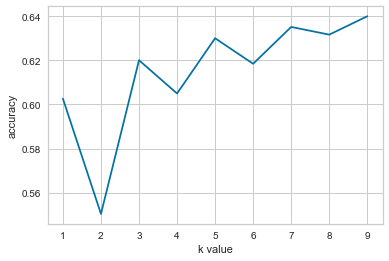

In [594]:
k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn, X, y, cv=10, scoring = 'accuracy')))
    
    
    
#plt.figure()    
plt.plot(k_range, scores)
plt.xlabel('k value')
plt.ylabel('accuracy')

## GradientBoostingClassifier


In [595]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [596]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# initialize 
gb = GradientBoostingClassifier(n_estimators=100, random_state=0)

# fit the model
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [598]:
print(metrics.accuracy_score(y_test, gb.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, gb.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, gb.predict(X_test)))
print("--------------------------------------------------------")
#print(metrics.roc_auc_score(y_test, gb.predict(X_test)))


0.6956132497761862
--------------------------------------------------------
[[  0  19  11   0]
 [  2 128 170   0]
 [  1 106 622   5]
 [  0   1  25  27]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        30
           2       0.50      0.43      0.46       300
           3       0.75      0.85      0.80       734
           4       0.84      0.51      0.64        53

   micro avg       0.70      0.70      0.70      1117
   macro avg       0.52      0.45      0.47      1117
weighted avg       0.67      0.70      0.68      1117

--------------------------------------------------------


In [599]:
# 10-fold cross-validation

scores = cross_val_score(gb, X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.66133333 0.73726542 0.73726542 0.73726542 0.76675603 0.71505376
 0.72237197 0.69272237 0.63072776 0.57681941]
0.697758088502853


In [600]:
svm = SVC(gamma='scale', probability=True)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [601]:
print(metrics.accuracy_score(y_test, svm.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, svm.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, svm.predict(X_test)))
print("--------------------------------------------------------")
#print(metrics.roc_auc_score(y_test, svm.predict(X_test)))

0.6768128916741272
--------------------------------------------------------
[[  0   0  30   0]
 [  0   0 300   0]
 [  0   0 733   1]
 [  0   0  30  23]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00       300
           3       0.67      1.00      0.80       734
           4       0.96      0.43      0.60        53

   micro avg       0.68      0.68      0.68      1117
   macro avg       0.41      0.36      0.35      1117
weighted avg       0.49      0.68      0.56      1117

--------------------------------------------------------


C:\Users\mnajjartabar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [602]:
# 10-fold cross-validation
svm = SVC(gamma='auto')

scores = cross_val_score(svm, X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.65066667 0.6541555  0.6541555  0.6541555  0.65683646 0.65591398
 0.65768194 0.65498652 0.65498652 0.65768194]
0.6551220521446673


In [603]:
nn = MLPClassifier(solver='lbfgs', max_iter=500)
nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [604]:
print(metrics.accuracy_score(y_test, nn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, nn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, nn.predict(X_test)))
print("--------------------------------------------------------")
#print(metrics.roc_auc_score(y_test, nn.predict(X_test)))

0.6383169203222918
--------------------------------------------------------
[[  0   0  29   1]
 [  0   0 293   7]
 [  0   0 713  21]
 [  0   0  53   0]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00       300
           3       0.66      0.97      0.78       734
           4       0.00      0.00      0.00        53

   micro avg       0.64      0.64      0.64      1117
   macro avg       0.16      0.24      0.20      1117
weighted avg       0.43      0.64      0.51      1117

--------------------------------------------------------


C:\Users\mnajjartabar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [605]:
Image(url= "https://s.hdnux.com/photos/01/03/74/10/17809955/3/480x480.png")
